**0 - hate speech | 1 - offensive language | 2 - neither**


In [1]:
import os 
import numpy as np 
import pandas as pd 
import nltk 
import re 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Reading the Dataset from Drive:
file_path = 'C:\\Users\\Mohd Kaif\\Downloads\\hate_speech_data.csv'
df = pd.read_csv(file_path)

In [3]:
# Extract text and class columns into lists
text = df['tweet'].tolist()
clas = df['class'].tolist()

In [4]:
# Create a new DataFrame for easy text processing
new_df = pd.DataFrame({'tweet': text, 'class': clas})

In [5]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
text = []
clas = []

In [7]:
text = df['tweet'].tolist()
clas = df['class'].tolist()

In [8]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
df = pd.DataFrame({'tweet': text, 'class': clas})

In [10]:
df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [11]:
# Display unique values in the "class" column
unique_classes = df['class'].unique()
print("Unique values in the 'class' column:")
print(unique_classes)

Unique values in the 'class' column:
[2 1 0]


In [12]:
# Display unique values and their counts in the "class" column
class_counts = df['class'].value_counts()
print("Class Label Descriptions:")
print(class_counts)

Class Label Descriptions:
1    19190
2     4163
0     1430
Name: class, dtype: int64


In [13]:
# Checking for Null Value:
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


In [14]:
# Convert the 'tweet' column to lowercase
df['tweet'] = df['tweet'].str.lower()

In [15]:
df.head()

,tweet,class
0,!!! rt @mayasolovely: as a woman you shouldn't...,2
1,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,1
3,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,1


In [16]:
import string
punctuation_signs = string.punctuation
# Remove punctuation from the 'tweet' column
df['tweet'] = df['tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation_signs)))

In [17]:
df.head()

,tweet,class
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt mleew17 boy dats coldtyga dwn bad for cuff...,1
2,rt urkindofbrand dawg rt 80sbaby4life you eve...,1
3,rt cganderson vivabased she look like a tranny,1
4,rt shenikaroberts the shit you hear about me ...,1


In [18]:
import re
# Define a function to clean text
def clean_text(text):
    # Replace '\n' and '\t' with a space
    text = text.replace('\n', ' ').replace('\t', ' ')
    # Replace multiple spaces with a single space using regex
    text = re.sub(r'\s+', ' ', text)
    # Remove double and single quotes
    text = text.replace('"', '').replace("'", '')
    # Remove possessive "'s"
    text = text.replace("'s", "")
    return text
# Apply the cleaning function to the 'tweet' column
df['tweet'] = df['tweet'].apply(clean_text)

In [19]:
df.head()

,tweet,class
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt mleew17 boy dats coldtyga dwn bad for cuff...,1
2,rt urkindofbrand dawg rt 80sbaby4life you eve...,1
3,rt cganderson vivabased she look like a tranny,1
4,rt shenikaroberts the shit you hear about me ...,1


In [20]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'tweet' column
for stop_word in stop_words:
    # Create a regex pattern for the stopword
    regex_stopword = r"\b" + stop_word + r"\b"
    
    # Replace the stopword with an empty string in the 'tweet' column
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to C:\Users\Mohd
[nltk_data]     Kaif\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Mohd Kaif\AppData\Local\Temp\ipykernel_9860\827983850.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [21]:
df.head()

,tweet,class
0,rt mayasolovely woman shouldnt complain c...,2
1,rt mleew17 boy dats coldtyga dwn bad cuffin ...,1
2,rt urkindofbrand dawg rt 80sbaby4life ever f...,1
3,rt cganderson vivabased look like tranny,1
4,rt shenikaroberts shit hear might true ...,1


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# Using Bag of Words approach for final data Preparation
cv = CountVectorizer(max_features=75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

In [23]:
from sklearn.model_selection import train_test_split
# Splitting the Data using Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [24]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump

In [25]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [26]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [27]:
# Make predictions and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.83


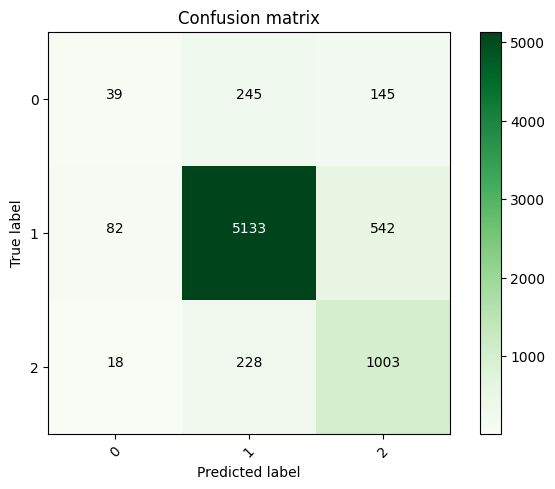

['rf.joblib']

In [28]:
# Generate and plot confusion matrix
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes=range(3))
# Save the trained model
dump(clf, 'rf.joblib')

In [29]:
from sklearn.tree import DecisionTreeClassifier
from joblib import dump

In [30]:
# Train the Decision Tree Classifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [31]:
# Make predictions and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


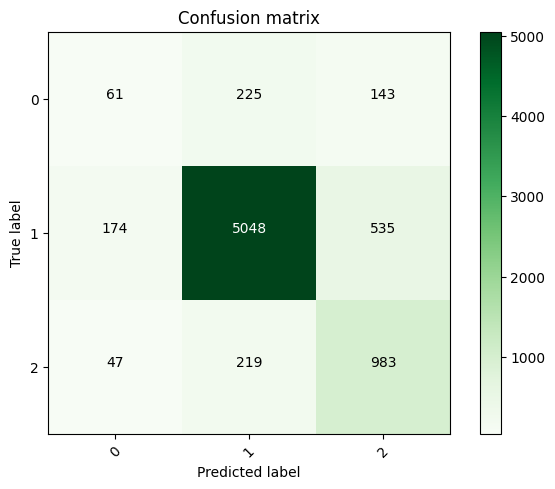

In [32]:
# Generate and plot confusion matrix
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes=range(3))

In [33]:
# Save the trained model
dump(clf, 'decision.joblib')

['decision.joblib']

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from joblib import dump

In [35]:
# Train the AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)

In [36]:
# Make predictions and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


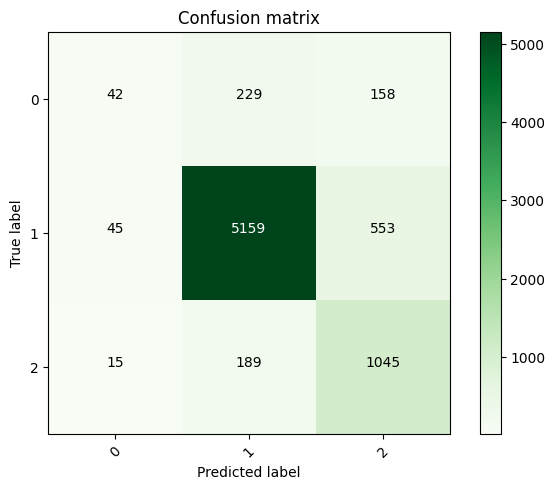

In [37]:
# Generate and plot confusion matrix
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes=range(3))

In [38]:
# Save the trained model
dump(clf, 'ada.joblib')

['ada.joblib']

In [39]:
from tensorflow.keras.utils import to_categorical
# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=3, dtype='float32')
y_test = to_categorical(y_test, num_classes=3, dtype='float32')

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
# Create and compile the LSTM model
model = Sequential([
    Embedding(232337, 100, input_length=X_train.shape[1]),
    SpatialDropout1D(0.2),
    LSTM(20, dropout=0.2, recurrent_dropout=0.2),
    Dense(3, activation='softmax')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)



Epoch 1/25


272/272 [==============================] - 92s 310ms/step - loss: 0.4252 - accuracy: 0.7675 - val_loss: 0.4025 - val_accuracy: 0.7743
Epoch 2/25
272/272 [==============================] - 79s 290ms/step - loss: 0.4027 - accuracy: 0.7743 - val_loss: 0.4025 - val_accuracy: 0.7743
Epoch 3/25
272/272 [==============================] - 82s 302ms/step - loss: 0.4026 - accuracy: 0.7743 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 4/25
272/272 [==============================] - 81s 299ms/step - loss: 0.4027 - accuracy: 0.7743 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 5/25
272/272 [==============================] - 78s 289ms/step - loss: 0.4027 - accuracy: 0.7743 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 6/25
272/272 [==============================] - 85s 314ms/step - loss: 0.4025 - accuracy: 0.7743 - val_loss: 0.4019 - val_accuracy: 0.7743
Epoch 7/25
272/272 [==============================] - 80s 294ms/step - loss: 0.4019 - accuracy: 0.7743 - val_loss: 0.4015 - va

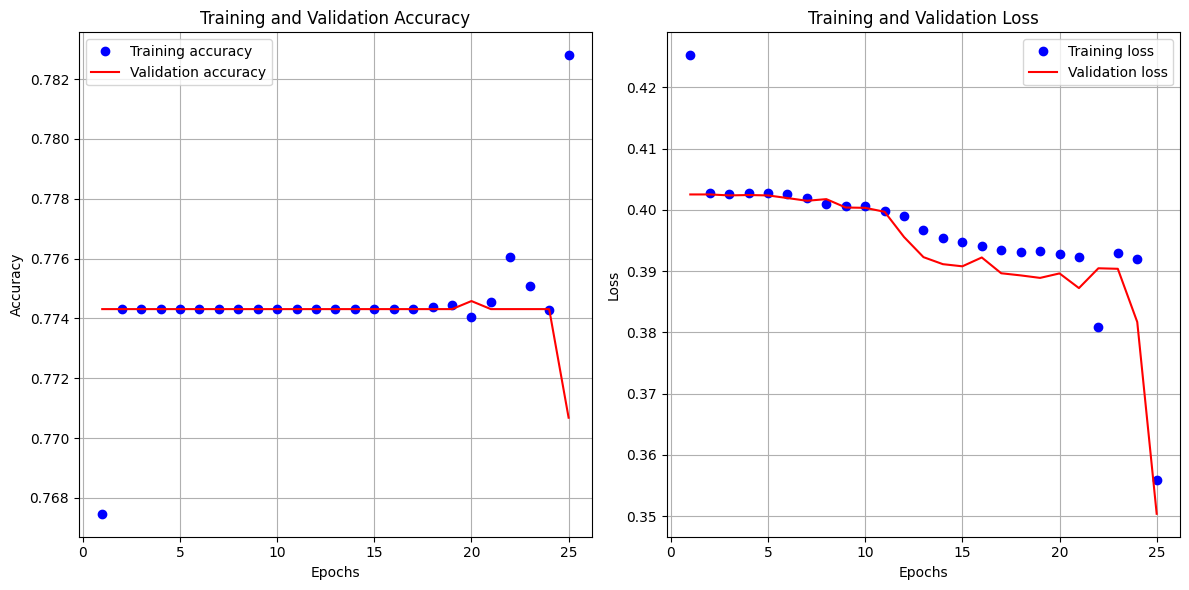

In [41]:
import matplotlib.pyplot as plt
# Extracting training and validation accuracy, loss from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [42]:
model.save('lstm.h5')

C:\Users\Mohd Kaif\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
